In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
df_train=pd.read_csv(r"C:\Users\racha\Downloads\SalaryData_Train.csv")
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df_test=pd.read_csv(r"C:\Users\racha\Downloads\SalaryData_Test.csv")
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
df_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [6]:
df_train.shape

(30161, 14)

In [7]:
df_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
df_train.value_counts('Salary')

Salary
 <=50K    22653
 >50K      7508
Name: count, dtype: int64

In [9]:
category_col =['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary'] 
for c in category_col:
    print (c)
    print (df_train[c].value_counts())
    print('\n')

workclass
workclass
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: count, dtype: int64


education
education
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: count, dtype: int64


maritalstatus
maritalstatus
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: count, dtype: int64


occupation
occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-m

<Axes: >

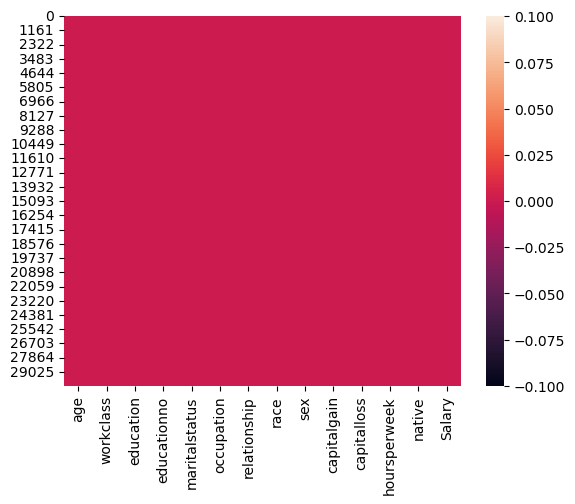

In [10]:
import seaborn as sns
sns.heatmap(df_train.isnull())

C:\Users\racha\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Salary', ylabel='count'>

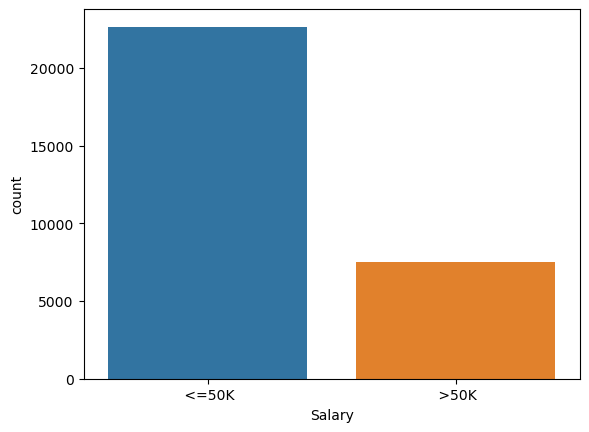

In [12]:
import seaborn as sns

# Convert "Salary" column to categorical
df_train["Salary"] = df_train["Salary"].astype('category')

# Plot the count using countplot
sns.countplot(data=df_train, x="Salary")


# Printing unique values from each categorical columns

In [14]:
print('workclass',df_train.workclass.unique())
print('education',df_train.education.unique())
print('maritalstatus',df_train['maritalstatus'].unique())
print('occupation',df_train.occupation.unique())
print('relationship',df_train.relationship.unique())
print('race',df_train.race.unique())
print('sex',df_train.sex.unique())
print('native',df_train['native'].unique())
print('Salary',df_train.Salary.unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
maritalstatus [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex [' Male' ' Female']
native [' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras

In [15]:
df_train[['Salary', 'age']].groupby(['Salary'], as_index=False).mean().sort_values(by='age', ascending=False)

C:\Users\racha\AppData\Local\Temp\ipykernel_15440\2378842623.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_train[['Salary', 'age']].groupby(['Salary'], as_index=False).mean().sort_values(by='age', ascending=False)


,Salary,age
1,>50K,43.959110
0,<=50K,36.608264


C:\Users\racha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\racha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


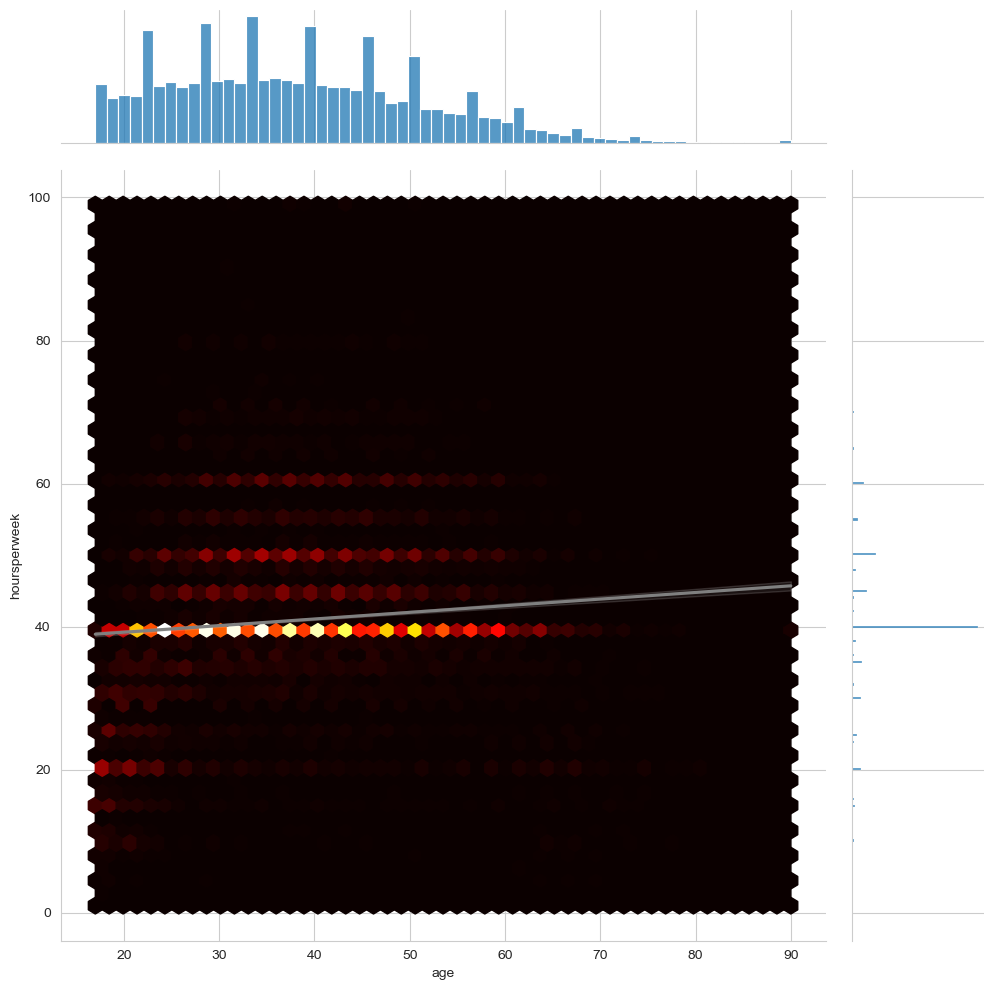

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.jointplot(x='age', 
                  y='hoursperweek',
                  data=df_train, 
                  kind='hex', 
                  cmap='hot', 
                  height=10)

# Overlay a regression line onto the hexbins
sns.regplot(x=df_train.age, y=df_train['hoursperweek'], ax=g.ax_joint, scatter=False, color='grey')

plt.show()


# Feature encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
df_train = df_train.apply(LabelEncoder().fit_transform)
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [22]:
df_test = df_test.apply(LabelEncoder().fit_transform)
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


In [24]:
drop_elements = ['education', 'native', 'Salary']
X = df_train.drop(drop_elements, axis=1)
y = df_train['Salary']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Building Multinomial Naive Bays Model

In [26]:
from sklearn.naive_bayes import MultinomialNB as MB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(X_train, y_train)

MultinomialNB()

In [27]:
score_multinomial_train = classifier_mb.score(X_train,y_train)
print('The accuracy of Gaussian Naive Bayes is', score_multinomial_train)

The accuracy of Gaussian Naive Bayes is 0.7788390161825111


In [25]:
score_multinomial = classifier_mb.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_multinomial)

The accuracy of Gaussian Naive Bayes is 0.7796865581675708


# Testing Multinomial Naive Bayes model on SalaryData_Test.csv

In [26]:
from sklearn import metrics

drop_elements = ['education', 'native', 'Salary']
X_new = df_test.drop(drop_elements, axis=1)

y_new = df_test['Salary']

In [27]:
new_prediction = classifier_mb.predict(X_new)
# summarize the fit of the model
print(metrics.classification_report(y_new, new_prediction))
print(metrics.confusion_matrix(y_new, new_prediction))

print("Accuracy:",metrics.accuracy_score(y_new, new_prediction))
print("Precision:",metrics.precision_score(y_new, new_prediction))
print("Recall:",metrics.recall_score(y_new, new_prediction))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87     11360
           1       0.61      0.30      0.40      3700

    accuracy                           0.78     15060
   macro avg       0.71      0.62      0.63     15060
weighted avg       0.76      0.78      0.75     15060

[[10648   712]
 [ 2587  1113]]
Accuracy: 0.7809428950863214
Precision: 0.6098630136986302
Recall: 0.3008108108108108


# Building Gaussian Naive Bayes Model

In [28]:
from sklearn.naive_bayes import GaussianNB as GB

classifier_gb = GB()
classifier_gb.fit(X_train, y_train)

GaussianNB()

In [29]:
score_gaussian_train = classifier_gb.score(X_train,y_train)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian_train)

The accuracy of Gaussian Naive Bayes is 0.8108576235957836


# Testing Gaussian Naive Bays Model on SalaryData_test.csv

In [30]:
new_prediction = classifier_gb.predict(X_new)
# summarize the fit of the model
print(metrics.classification_report(y_new, new_prediction))
print(metrics.confusion_matrix(y_new, new_prediction))

print("Accuracy:",metrics.accuracy_score(y_new, new_prediction))
print("Precision:",metrics.precision_score(y_new, new_prediction))
print("Recall:",metrics.recall_score(y_new, new_prediction))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88     11360
           1       0.69      0.45      0.54      3700

    accuracy                           0.81     15060
   macro avg       0.76      0.69      0.71     15060
weighted avg       0.80      0.81      0.80     15060

[[10604   756]
 [ 2038  1662]]
Accuracy: 0.8144754316069057
Precision: 0.6873449131513648
Recall: 0.4491891891891892


# Compare train and test accuracy
The training-set accuracy score is 0.8108 while the test-set accuracy to be 0.8120.
These two values are quite comparable. So, there is no sign of overfitting